In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab

# Question 4

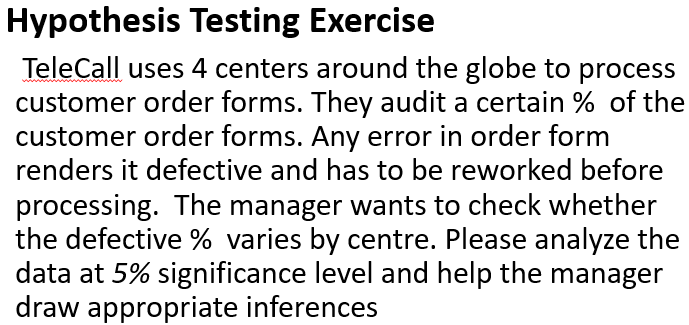

In [2]:
ImageGrab.grabclipboard()

### We are going to conduct a Test of Independence using Chi-Square $\chi_2$ test with Contingency table

#### We need to check whether the mean of any of these samples are different or the same?

### Step 1
##### Make two Hypothesis one contradicting to other 
##### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente

### Step 2
#### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

### Step 3 
#### Collect evidence

#### Importing Files

In [3]:
df = pd.read_csv('data/Costomer+OrderForm.csv')

In [4]:
df.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


#### Applying Descriptive Statistics

In [5]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


#### Checking for Null Values

In [6]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


#### Checking the data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


#### Checking value counts in data

In [9]:
print(df['Phillippines'].value_counts(),'\n',df['Indonesia'].value_counts(),'\n',df['Malta'].value_counts(),'\n',df['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


#### Creating Contingency table

In [10]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


#### Calculating Expected Values for Observed data

In [11]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


#### Defining Expected values and observed values

In [12]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

### Step 4
#### Compare Evidences with Hypothesis using t-statictic

In [13]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


#### Plotting the data

#### Compare p_value with '$\alpha$ '(Significane Level)

#### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
#### If p_value is = '$\alpha$ ' we reject Null Hypothesis

#### interpreting p-value

In [14]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack of evidence.